# Analysis of TOBIAS output

## Load libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
plt.rc('text', usetex=True)
plt.rcParams['text.latex.preamble'] = r'\boldmath \usepackage{amsmath} \usepackage{amssymb}'
from matplotlib.pyplot import cm

from adjustText import adjust_text

import scipy

import itertools
from collections import Counter

from scipy.stats.stats import pearsonr 

import gc

## Load data

In [2]:
data_dir = '/home/andrew/biology/xdf/rotation3/mammalian_eftfs/data/tobias/bindetect_results'


## differential binding data ##
tobias_bindetect_file = 'bindetect_results_full_timecourse.txt'

# rna-seq files #
rna_data_dir = '../data'
rna_file = 'RNAseq-DEseq2-preprocessed-norm-counts.tsv'

#
tf_database_file = '/home/andrew/biology/xdf/projects/utils/TF_lists/Mus_musculus_TF.txt'

In [3]:
## ------------------------------------------  ##
## -- load TOBIAS differential binding data -- ##
## ------------------------------------------- ##
bindetect_results          = pd.read_csv(data_dir+'/'+tobias_bindetect_file,sep='\t')

In [4]:
## ---------------------  ##
## -- load RNAseq data -- ##
## ---------------------- ##
rna_df = pd.read_csv(rna_data_dir+'/'+rna_file, sep='\t')

rna_df['day0'] = rna_df[['Day0_1','Day0_2','Day0_3']].mean(axis=1)
rna_df['day1'] = rna_df[['Day1_1','Day1_2','Day1_3']].mean(axis=1)
rna_df['day2'] = rna_df[['Day2_1','Day2_2','Day2_3']].mean(axis=1)
rna_df['day3'] = rna_df[['Day3_1','Day3_2','Day3_3']].mean(axis=1)
rna_df['day4-gfpneg'] = rna_df[['Day4_GFPneg_1','Day4_GFPneg_2','Day4_GFPneg_3']].mean(axis=1)
rna_df['day4-gfppos'] = rna_df[['Day4_GFPpos_1','Day4_GFPpos_2','Day4_GFPpos_3']].mean(axis=1)
rna_df['day5-gfpneg'] = rna_df[['Day5_GFPneg_1','Day5_GFPneg_2','Day5_GFPneg_3']].mean(axis=1)
rna_df['day5-gfppos'] = rna_df[['Day5_GFPpos_1','Day5_GFPpos_2','Day5_GFPpos_3']].mean(axis=1)

In [5]:
## load Mus musculus TF list
tf_list_df = pd.read_csv(tf_database_file,sep='\t')
tf_list = tf_list_df['Symbol'].tolist()
print(len(tf_list))

ef_up_tfs   = rna_df['ext_gene'][rna_df['ext_gene'].isin(tf_list) & rna_df['EF-up']].tolist()
ef_down_tfs = rna_df['ext_gene'][rna_df['ext_gene'].isin(tf_list) & rna_df['EF-down']].tolist()

## number of up and down-regulated genes that are TFs ##
print('EF up TFs:  ', len(ef_up_tfs), 'of', rna_df['EF-up'].sum())
print('EF down TFs:', len(ef_down_tfs), 'of', rna_df['EF-down'].sum())

d2d3_up_tfs   = rna_df['ext_gene'][rna_df['ext_gene'].isin(tf_list) & rna_df['D2-D3-up']].tolist()
d2d3_down_tfs = rna_df['ext_gene'][rna_df['ext_gene'].isin(tf_list) & rna_df['D2-D3-down']].tolist()
print('D2-D3 TFs:' ,len(d2d3_up_tfs), len(d2d3_down_tfs))

d1d2_up_tfs   = rna_df['ext_gene'][rna_df['ext_gene'].isin(tf_list) & rna_df['D1-D2-up']].tolist()
d1d2_down_tfs = rna_df['ext_gene'][rna_df['ext_gene'].isin(tf_list) & rna_df['D1-D2-down']].tolist()
print('D1-D2 TFs:' ,len(d1d2_up_tfs), len(d1d2_down_tfs))

d0d1_up_tfs   = rna_df['ext_gene'][rna_df['ext_gene'].isin(tf_list) & rna_df['D0-D1-up']].tolist()
d0d1_down_tfs = rna_df['ext_gene'][rna_df['ext_gene'].isin(tf_list) & rna_df['D0-D1-down']].tolist()
print('D0-D1 TFs:' ,len(d0d1_up_tfs), len(d0d1_down_tfs))

print()
print(sorted(rna_df['ext_gene'][rna_df['ext_gene'].isin(tf_list) & rna_df['D2-D3-up']].tolist()))
print(sorted(rna_df['ext_gene'][rna_df['ext_gene'].isin(tf_list) & rna_df['D2-D3-down']].tolist()))

print('D2-D3-up TFs:  ', len(d2d3_up_tfs), 'of', rna_df['D2-D3-up'].sum())
print('D2-D3-down TFs:', len(d2d3_down_tfs), 'of', rna_df['D2-D3-down'].sum())
print()
print(sorted(list(set(set(d2d3_up_tfs) & set(ef_up_tfs)))))
print(sorted(list(set(set(d2d3_up_tfs) & set(ef_down_tfs)))))
print(sorted(list(set(set(d2d3_down_tfs) & set(ef_up_tfs)))))
print(sorted(list(set(set(d2d3_down_tfs) & set(ef_down_tfs)))))

1636
EF up TFs:   11 of 37
EF down TFs: 65 of 453
D2-D3 TFs: 31 10
D1-D2 TFs: 13 19
D0-D1 TFs: 4 17

['Crx', 'Evx1', 'Fezf1', 'Fezf2', 'Foxb1', 'Foxd4', 'Gsc', 'Hesx1', 'Irx3', 'Irx5', 'Lhx1', 'Lhx2', 'Lhx5', 'Lmx1b', 'Mesp1', 'Mixl1', 'Neurog2', 'Pax2', 'Pknox2', 'Prox1', 'Rax', 'Sall3', 'Six3', 'Sox9', 'Sp5', 'Sp8', 'T', 'Zeb2', 'Zfhx4', 'Zfp521', 'Zfp935']
['Etv4', 'Gm4969', 'Parp12', 'Pax8', 'Rhox1', 'Six1', 'Sohlh1', 'Tal1', 'Tcf15', 'Wt1']
D2-D3-up TFs:   31 of 165
D2-D3-down TFs: 10 of 85

['Fezf1', 'Lhx2', 'Rax', 'Six3']
['Gsc', 'Irx3', 'Lmx1b', 'Mixl1', 'T']
[]
['Etv4', 'Tcf15']


In [6]:
###################################################################
### generate list of motifs in motif database and are expressed ###
###################################################################

rna_thr = 50 ## DEseq2 RNAseq normalization

motif_names = list(bindetect_results['name'].tolist())
motif_names_format = [motif.split('_')[0].capitalize() for motif in motif_names]
motif_names_format = [motif.split('(')[0] for motif in motif_names_format]

motif_w_rna_signal = rna_df['ext_gene'][rna_df['ext_gene'].isin(motif_names_format)].tolist()
motif_w_rna_signal = list(set(motif_w_rna_signal))
rna_days_test = ['day1','day2','day3','day4-gfppos','day5-gfppos']

jasper_names = list(bindetect_results['output_prefix'].tolist())
expressed_motifs = []
expressed_motifs_names = []
for motif in motif_w_rna_signal:
    
    tmp_rna_max_signal = rna_df[rna_days_test][rna_df['ext_gene'] == motif].values.max()
    
    if tmp_rna_max_signal > rna_thr:
        
        tmp_list = list(np.array(jasper_names)[np.where(np.array(motif_names_format)==motif)[0]])
        expressed_motifs.append(tmp_list) ## there can be > 1 motif per TF
        expressed_motifs_names.append([motif]*len(tmp_list))
        #expressed_motifs.append(jasper_names[np.where(np.array(motif_names_format)==motif)[0][0]])
        #expressed_motifs_names.append(motif)

expressed_motifs = [item for sublist in expressed_motifs for item in sublist]
expressed_motifs_names = [item for sublist in expressed_motifs_names for item in sublist]

expressed_motifs.append('Pou5f1Sox2_MA0142.1')
expressed_motifs_names.append('Pou5f1::Sox2')
expressed_motifs.append('FOSJUN_MA0099.2')
expressed_motifs_names.append('Fos::Jun')
expressed_motifs.append('Hand1Tcf3_MA0092.1')
expressed_motifs_names.append('Hand1::Tcf3')
expressed_motifs.append('Bach1Mafk_MA0591.1')
expressed_motifs_names.append('Bach1::Mafk')
expressed_motifs.append('Smad2Smad3_MA1622.1')
expressed_motifs_names.append('Smad2::Smad3')
expressed_motifs.append('Zic1Zic2_MA1628.1')
expressed_motifs_names.append('Zic1::Zic2')
expressed_motifs.append('Pax6Sox2_1_LO_meme_classic_1')
expressed_motifs_names.append('Pax6::Sox2_1')
expressed_motifs.append('Pax6Sox2_2_LO_meme_de_1')
expressed_motifs_names.append('Pax6::Sox2_2')
expressed_motifs.append('Pax6Sox2_3_LO_meme_de_2')
expressed_motifs_names.append('Pax6::Sox2_3')
expressed_motifs.append('Pax6Sox2_4_LO_meme_de_3')
expressed_motifs_names.append('Pax6::Sox2_4')

print(len(expressed_motifs), len(expressed_motifs_names))

364 364


## Differential binding genome-wide

In [7]:
ef_up_genes   = rna_df['ext_gene'][rna_df['EF-up']].tolist()
ef_down_genes = rna_df['ext_gene'][rna_df['EF-down']].tolist()
print(ef_up_genes)

['Lhx2', 'Efnb2', 'Vax1', 'Phlda1', 'Foxg1', 'Six6', 'Edn1', 'Vit', 'Rax', 'Igfbp5', 'Ermn', 'Pax6', 'Fezf1', 'Lmo3', 'Necab2', 'Slc38a8', 'Pcdh17', 'Tmtc2', 'Six3', 'Shisa2', 'Fzd1', 'Nxph1', 'Minar2', 'Maf', 'Mab21l1', 'Nlgn1', 'Arid3c', 'Gbx1', 'Ptprz1', 'Grem1', 'Slc8a3', 'BC064078', 'Gm13584', 'Six3os1', 'Gm26709', 'Raxos1', 'Gm27197']


In [8]:
motifs_select = ['Lhx2', 'Lhx2_2',
                 'Pax6', 'Pax6_2',
                 'Rax', 'Rax_2',
                 'Six3', 'Six3_2',
                 'Pou5f1::Sox2', #'Pou5f1_2',
                 'Sox2_1', 'Sox2_2', #'Sox2_3',
                 'Pou5f1', 
                 'Otx2', 'Otx2_2']

efup_genes_plt   = ['Rax','Rax_2','Pax6','Pax6_2','Lhx2','Lhx2_2','Gbx1']
efdown_genes_plt = ['Rhox6', 'Lmx1b', 'En2', 
                    'Pou5f1','Pou5f1_2', 'Dmrt1', 'RUNX1', 'Nr5a2' ]
ef_related_genes_plt = ['Otx2', 'Otx2_2','Sox2','Sox2_1', 'Sox2_2', 'Sox2_3']

In [9]:
bool_expressed_motifs = bindetect_results['output_prefix'].isin(expressed_motifs)
print(bool_expressed_motifs.sum())
print([motif for motif in expressed_motifs if motif not in bindetect_results['output_prefix'].tolist()])

364
[]


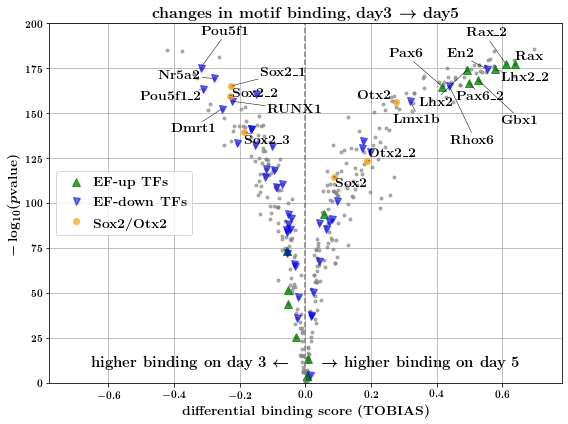

In [10]:
###############################
## differential binding plot ##
###############################
bindetect_plt_df = bindetect_results[bool_expressed_motifs]
bindetect_plt_df = bindetect_plt_df.set_index('output_prefix')

motif_names_arr = np.array(bindetect_plt_df.index.tolist())
motif_gene_names_arr = np.array([motif.split('_')[0].split('(')[0].capitalize() for motif in motif_names_arr])
bool_efup_tfs   = np.in1d(motif_gene_names_arr,ef_up_genes)
bool_efdown_tfs = np.in1d(motif_gene_names_arr,ef_down_genes)
bool_ef_related_tfs = np.in1d(motif_gene_names_arr,ef_related_genes_plt)
bool_other = (~bool_efup_tfs) & (~bool_efdown_tfs) & (~bool_ef_related_tfs) 

## note minus sign in diff scores, to flip d3 and d5 in plot ##
plt_diff_scores      = - bindetect_plt_df['D3_footprints_D5_GFPplus_footprints_change'].values
plt_diff_scores_pval = -np.log10(bindetect_plt_df['D3_footprints_D5_GFPplus_footprints_pvalue'].values)

plt.figure(figsize=(8,6))
plt.plot(plt_diff_scores, plt_diff_scores_pval,'o',markersize=3,color='Gray',alpha=0.6)
plt.plot(plt_diff_scores[bool_efup_tfs], plt_diff_scores_pval[bool_efup_tfs],
         '^',markersize=8,color='Green',alpha=0.75,label=r'\bf EF-up TFs')
plt.plot(plt_diff_scores[bool_efdown_tfs], plt_diff_scores_pval[bool_efdown_tfs],
         'v',markersize=7,color='Blue',alpha=0.6,label=r'\bf EF-down TFs')
plt.plot(plt_diff_scores[bool_ef_related_tfs], plt_diff_scores_pval[bool_ef_related_tfs],
         'o',markersize=6,color='Orange',alpha=0.7,label=r'\bf Sox2/Otx2')
ax = plt.gca()

texts1 = []
efup_genes_plt
for k, motif in enumerate(efup_genes_plt):
    motif_idx = bindetect_plt_df['name'].to_list().index(motif)
    texts1.append(plt.text(plt_diff_scores[motif_idx],plt_diff_scores_pval[motif_idx],
                                 r'\bf '+motif.replace('_','\_'),
                                 fontsize=14))
    
for k, motif in enumerate(efdown_genes_plt):
    motif_idx = bindetect_plt_df['name'].to_list().index(motif)
    texts1.append(plt.text(plt_diff_scores[motif_idx],plt_diff_scores_pval[motif_idx],
                                 r'\bf '+motif.replace('_','\_'),
                                 fontsize=14))
    
for k, motif in enumerate(ef_related_genes_plt):
    motif_idx = bindetect_plt_df['name'].to_list().index(motif)
    texts1.append(plt.text(plt_diff_scores[motif_idx],plt_diff_scores_pval[motif_idx],
                                 r'\bf '+motif.replace('_','\_'),
                                 fontsize=14))

plt.xlim(-0.78,0.78)
plt.ylim(0,200)
adjust_text(texts1,arrowprops=dict(arrowstyle="-", color='k', lw=0.5),force_text=(0.3, 1.5))

plt.axvline(0.0,linestyle='--',lw=1.5,color='Gray')

plt.ylabel(r'\bf $-\log_{10}(p\text{value})$',fontsize=14)
plt.xlabel(r'\bf differential binding score (TOBIAS)',fontsize=14)
plt.text(0.47,0.058,r'\bf higher binding on day 3 $\leftarrow$',transform=ax.transAxes, 
            horizontalalignment='right',verticalalignment='center',fontsize=15)
plt.text(0.53,0.058,r'\bf $\rightarrow$ higher binding on day 5',transform=ax.transAxes, 
            horizontalalignment='left',verticalalignment='center',fontsize=15)

plt.legend(fontsize=14,loc='center left',handletextpad=0.2)
plt.title(r'\bf changes in motif binding, day3 $\to$ day5',fontsize=16)

plt.grid()
plt.tight_layout()
#file_str = '06_organoids_tobias_d3d5_differential_binding_scores_genome-wide.pdf'
#plt.savefig('./figures_paper/'+file_str)
plt.show()

## Footprinting plots (bound instances) -- triplets of motifs

In [11]:
aggr_footprint_dir = '/home/andrew/biology/xdf/rotation3/mammalian_eftfs/data/tobias/footprint_aggregate_files'

motif_id_list    = ['Rax_1', 'Pax6_1','Lhx2_1']
motif_name_list  = ['Rax-1', 'Pax6-1','Lhx2-1']
motif_width_list = [17,16,17]
#
# motif_id_list    = ['Pou5f1_1', 'Sox2_2','Otx2_1']
# motif_name_list  = ['Pou5f1-1', 'Sox2-2','Otx2-1']
# motif_width_list = [11,15,17]

d3_signal_d3_bound_gw_list = []
d3_signal_d5_bound_gw_list = []
d5_signal_d3_bound_gw_list = []
d5_signal_d5_bound_gw_list = []
#
d3_signal_d3_bound_EFup_list = []
d3_signal_d5_bound_EFup_list = []
d5_signal_d3_bound_EFup_list = []
d5_signal_d5_bound_EFup_list = []

for k, motif_id in enumerate(motif_id_list):

    aggr_footprint_gw_file   = motif_id+'_footprints_bound_genome-wide_d3_d5p.txt'
    aggr_footprint_EFup_file = motif_id+'_footprints_bound_EF-peaks_d3_d5p.txt'


    ## read .txt file containing aggregate signal ##
    with open(aggr_footprint_dir+'/'+aggr_footprint_gw_file) as file:
        lines = [line.rstrip() for line in file]


    d3_signal_d3_bound_gw = np.array(lines[2].split('\t')[2].split(',')).astype(float)
    d3_signal_d5_bound_gw = np.array(lines[3].split('\t')[2].split(',')).astype(float)
    d5_signal_d3_bound_gw = np.array(lines[4].split('\t')[2].split(',')).astype(float)
    d5_signal_d5_bound_gw = np.array(lines[5].split('\t')[2].split(',')).astype(float)
    #
    d3_signal_d3_bound_gw_list.append(d3_signal_d3_bound_gw)
    d3_signal_d5_bound_gw_list.append(d3_signal_d5_bound_gw)
    d5_signal_d3_bound_gw_list.append(d5_signal_d3_bound_gw)
    d5_signal_d5_bound_gw_list.append(d5_signal_d5_bound_gw)

    ## read .txt file containing aggregate signal ##
    with open(aggr_footprint_dir+'/'+aggr_footprint_EFup_file) as file:
        lines = [line.rstrip() for line in file]

    d3_signal_d3_bound_EFup = np.array(lines[2].split('\t')[2].split(',')).astype(float)
    d3_signal_d5_bound_EFup = np.array(lines[3].split('\t')[2].split(',')).astype(float)
    d5_signal_d3_bound_EFup = np.array(lines[4].split('\t')[2].split(',')).astype(float)
    d5_signal_d5_bound_EFup = np.array(lines[5].split('\t')[2].split(',')).astype(float)
    #
    d3_signal_d3_bound_EFup_list.append(d3_signal_d3_bound_EFup)
    d3_signal_d5_bound_EFup_list.append(d3_signal_d5_bound_EFup)
    d5_signal_d3_bound_EFup_list.append(d5_signal_d3_bound_EFup)
    d5_signal_d5_bound_EFup_list.append(d5_signal_d5_bound_EFup)

    bp_points = np.linspace(-100,100,len(d3_signal_d3_bound_gw))
    print(bp_points.shape)

(200,)
(200,)
(200,)


-9.0 8.0
-8.0 8.0
-9.0 8.0


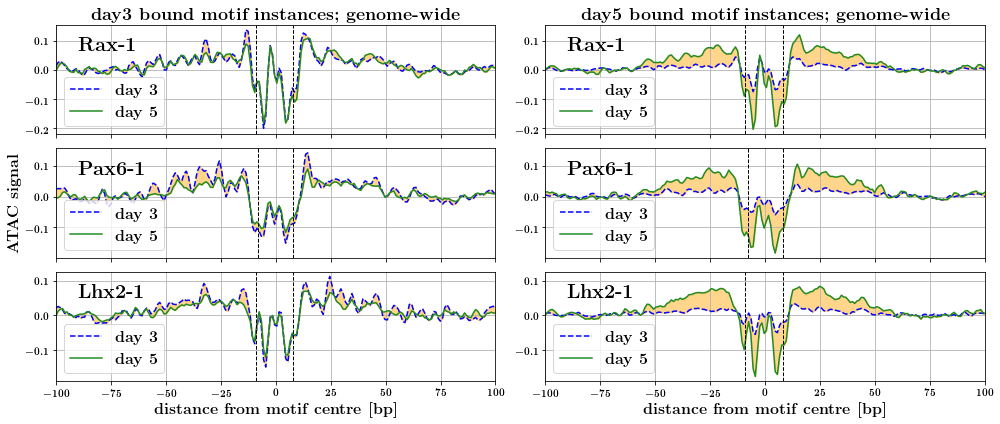

-9.0 8.0
-8.0 8.0
-9.0 8.0


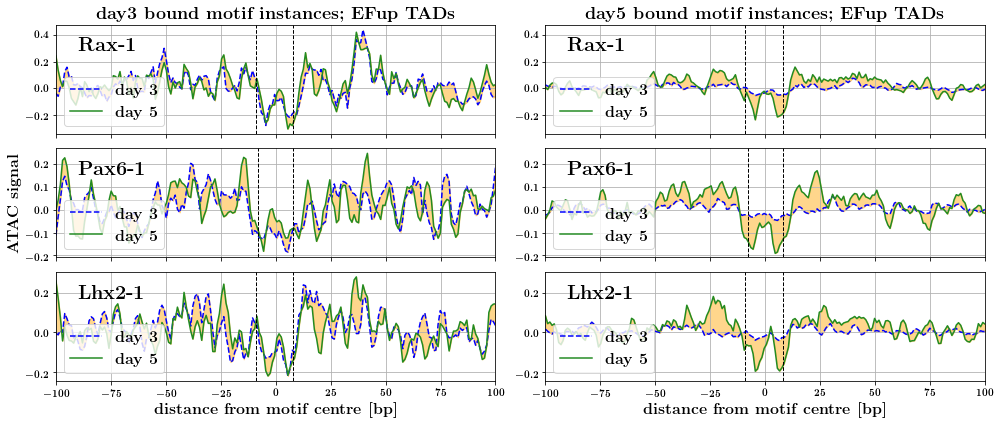

In [12]:

##############################################
## --- make plot: genome-wide instances --- ##
##############################################

fig, axs = plt.subplots(3,2,figsize=(14,6))
axs = axs.ravel()


for k, motif_label in enumerate(motif_name_list):

    motif_width = motif_width_list[k]
    plt_left,plt_right = -np.ceil(motif_width/2), np.floor(motif_width/2)
    print(plt_left, plt_right)


    ## --------------------------------------------------------------------- ##
    ## upper plots: aggregate (corrected) ATAC signal around motif instances ##
    ## --------------------------------------------------------------------- ##
    axs[2*k].plot(bp_points, d3_signal_d3_bound_gw_list[k], '--', color='Blue', label=r'\bf day 3')
    axs[2*k].plot(bp_points, d5_signal_d3_bound_gw_list[k], '-', color='ForestGreen', label=r'\bf day 5' )
    axs[2*k].fill_between(bp_points, 
                        d3_signal_d3_bound_gw_list[k],
                        d5_signal_d3_bound_gw_list[k], color='Orange',alpha=0.45)
    axs[2*k].grid()

    axs[2*k+1].plot(bp_points, d3_signal_d5_bound_gw_list[k], '--', color='Blue', label=r'\bf day 3')
    axs[2*k+1].plot(bp_points, d5_signal_d5_bound_gw_list[k], '-', color='ForestGreen', label=r'\bf day 5')
    axs[2*k+1].fill_between(bp_points, 
                        d3_signal_d5_bound_gw_list[k],
                        d5_signal_d5_bound_gw_list[k], color='Orange',alpha=0.45)
    axs[2*k+1].grid()


    axs[2*k].axvline(plt_left, lw=1.0,ls='--',color='Black')
    axs[2*k].axvline(plt_right,lw=1.0,ls='--',color='Black')
    axs[2*k+1].axvline(plt_left, lw=1.0,ls='--',color='Black')
    axs[2*k+1].axvline(plt_right,lw=1.0,ls='--',color='Black')

    ylow = np.array((axs[2*k].get_ylim(), axs[2*k+1].get_ylim())).min()
    yupp = np.array((axs[2*k].get_ylim(), axs[2*k+1].get_ylim())).max()

    axs[2*k].set_ylim(ylow,yupp)
    axs[2*k+1].set_ylim(ylow,yupp)
    axs[2*k].set_xlim(-100,100)
    axs[2*k+1].set_xlim(-100,100)
    
    if k != 2:
        axs[2*k].set_xticklabels([])
        axs[2*k+1].set_xticklabels([])
        

    axs[2*k].legend(fontsize=16,loc='lower left')
    axs[2*k+1].legend(fontsize=16,loc='lower left')




    axs[2*k].text(0.05,0.80,r'\bf '+motif_label,transform=axs[2*k].transAxes, 
                horizontalalignment='left',verticalalignment='center',fontsize=20)
    axs[2*k+1].text(0.05,0.80,r'\bf '+motif_label,transform=axs[2*k+1].transAxes, 
                horizontalalignment='left',verticalalignment='center',fontsize=20)


axs[0].set_title(r'\bf day3 bound motif instances; genome-wide',fontsize=18)
axs[1].set_title(r'\bf day5 bound motif instances; genome-wide',fontsize=18)
axs[-2].set_xlabel(r'\bf distance from motif centre [bp]',fontsize=16)
axs[-1].set_xlabel(r'\bf distance from motif centre [bp]',fontsize=16)
axs[2].set_ylabel(r'\bf ATAC signal',fontsize=16)

plt.tight_layout()
#file_str = '06_organoids-aggregate-footprints-triple-motifs-'+motif_label+'-genome-wide-bound-instances.pdf'
#print(file_str)
#plt.savefig('./figures_paper/'+file_str)
plt.show()



#######################################
## --- make plot: EFup instances --- ##
#######################################

fig, axs = plt.subplots(3,2,figsize=(14,6))
axs = axs.ravel()


for k, motif_label in enumerate(motif_name_list):

    motif_width = motif_width_list[k]
    plt_left,plt_right = -np.ceil(motif_width/2), np.floor(motif_width/2)
    print(plt_left, plt_right)


    ## --------------------------------------------------------------------- ##
    ## upper plots: aggregate (corrected) ATAC signal around motif instances ##
    ## --------------------------------------------------------------------- ##
    axs[2*k].plot(bp_points, d3_signal_d3_bound_EFup_list[k], '--', color='Blue', label=r'\bf day 3')
    axs[2*k].plot(bp_points, d5_signal_d3_bound_EFup_list[k], '-', color='ForestGreen', label=r'\bf day 5' )
    axs[2*k].fill_between(bp_points, 
                        d3_signal_d3_bound_EFup_list[k],
                        d5_signal_d3_bound_EFup_list[k], color='Orange',alpha=0.45)
    axs[2*k].grid()

    axs[2*k+1].plot(bp_points, d3_signal_d5_bound_EFup_list[k], '--', color='Blue', label=r'\bf day 3')
    axs[2*k+1].plot(bp_points, d5_signal_d5_bound_EFup_list[k], '-', color='ForestGreen', label=r'\bf day 5')
    axs[2*k+1].fill_between(bp_points, 
                        d3_signal_d5_bound_EFup_list[k],
                        d5_signal_d5_bound_EFup_list[k], color='Orange',alpha=0.45)
    axs[2*k+1].grid()


    axs[2*k].axvline(plt_left, lw=1.0,ls='--',color='Black')
    axs[2*k].axvline(plt_right,lw=1.0,ls='--',color='Black')
    axs[2*k+1].axvline(plt_left, lw=1.0,ls='--',color='Black')
    axs[2*k+1].axvline(plt_right,lw=1.0,ls='--',color='Black')

    ylow = np.array((axs[2*k].get_ylim(), axs[2*k+1].get_ylim())).min()
    yupp = np.array((axs[2*k].get_ylim(), axs[2*k+1].get_ylim())).max()

    axs[2*k].set_ylim(ylow,yupp)
    axs[2*k+1].set_ylim(ylow,yupp)
    axs[2*k].set_xlim(-100,100)
    axs[2*k+1].set_xlim(-100,100)
    
    if k != 2:
        axs[2*k].set_xticklabels([])
        axs[2*k+1].set_xticklabels([])
        

    axs[2*k].legend(fontsize=16,loc='lower left')
    axs[2*k+1].legend(fontsize=16,loc='lower left')

    axs[2*k].text(0.05,0.80,r'\bf '+motif_label,transform=axs[2*k].transAxes, 
                horizontalalignment='left',verticalalignment='center',fontsize=20)
    axs[2*k+1].text(0.05,0.80,r'\bf '+motif_label,transform=axs[2*k+1].transAxes, 
                horizontalalignment='left',verticalalignment='center',fontsize=20)


axs[0].set_title(r'\bf day3 bound motif instances; EFup TADs',fontsize=18)
axs[1].set_title(r'\bf day5 bound motif instances; EFup TADs',fontsize=18)
axs[-2].set_xlabel(r'\bf distance from motif centre [bp]',fontsize=16)
axs[-1].set_xlabel(r'\bf distance from motif centre [bp]',fontsize=16)
axs[2].set_ylabel(r'\bf ATAC signal',fontsize=16)

plt.tight_layout()
#file_str = '06_organoids-aggregate-footprints-triple-motifs-'+motif_label+'-EFup-bound-instances.pdf'
#print(file_str)
#plt.savefig('./figures_paper/'+file_str)
plt.show()

## Compute footprint depths and significance

In [13]:
from statsmodels.stats.multitest import multipletests

def compute_footprint_metrics(fp_motif_arr):
    """
    Input: array of aggregate atac-seq signal
    Output: array of tuples (fpd, fa), where fpd=footprint-depth, fa=flanking access
    """
    
    fpd_width = 24
    fa_width  = 60
    fpd_fa_arr = []
    
    for tmp_arr in fp_motif_arr:

        fpd_idx_low, fpd_idx_upp = int(len(tmp_arr)/2) - int(fpd_width/2), \
                                   int(len(tmp_arr)/2) + int(fpd_width/2)
        
        tmp_motif_fa  = np.append(tmp_arr[fpd_idx_low-fa_width:fpd_idx_low],
                                  tmp_arr[fpd_idx_upp:fpd_idx_upp+fa_width]).mean()
        tmp_motif_fpd = tmp_arr[fpd_idx_low:fpd_idx_upp].mean() - tmp_motif_fa

        #tmp_motif_fa  = 0.5*(tmp_arr[fpd_idx_low-fa_width:fpd_idx_low]+
        #                     tmp_arr[fpd_idx_upp:fpd_idx_upp+fa_width])

        fpd_fa_arr.append([tmp_motif_fpd, tmp_motif_fa])
        
    fpd_fa_arr = np.array(fpd_fa_arr)
    
    return fpd_fa_arr


import numpy as np
from scipy.spatial.distance import cdist, euclidean

## copied from https://stackoverflow.com/questions/30299267/geometric-median-of-multidimensional-points
def geometric_median(X, eps=1e-5):
    y = np.mean(X, 0)

    while True:
        D = cdist(X, [y])
        nonzeros = (D != 0)[:, 0]

        Dinv = 1 / D[nonzeros]
        Dinvs = np.sum(Dinv)
        W = Dinv / Dinvs
        T = np.sum(W * X[nonzeros], 0)

        num_zeros = len(X) - np.sum(nonzeros)
        if num_zeros == 0:
            y1 = T
        elif num_zeros == len(X):
            return y
        else:
            R = (T - y) * Dinvs
            r = np.linalg.norm(R)
            rinv = 0 if r == 0 else num_zeros/r
            y1 = max(0, 1-rinv)*T + min(1, rinv)*y

        if euclidean(y, y1) < eps:
            return y1

        y = y1

/home/andrew/bin/miniconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [14]:
aggr_footprint_dir = '/home/andrew/biology/xdf/rotation3/mammalian_eftfs/data/tobias/footprint_aggregate_files/all_jaspar_motifs'

motif_id_list    = expressed_motifs.copy()

d3_signal_d3_bound_gw_list = []
d3_signal_d5_bound_gw_list = []
d5_signal_d3_bound_gw_list = []
d5_signal_d5_bound_gw_list = []
#
d3_signal_d3_bound_EFup_list = []
d3_signal_d5_bound_EFup_list = []
d5_signal_d3_bound_EFup_list = []
d5_signal_d5_bound_EFup_list = []
#
d3_signal_all_gw_list = []
d5_signal_all_gw_list = []
d3_signal_all_EFup_list = []
d5_signal_all_EFup_list = []

for k, motif_id in enumerate(motif_id_list):

    aggr_footprint_gw_file   = motif_id+'_footprints_bound_genome-wide_d3_d5p.txt'
    aggr_footprint_EFup_file = motif_id+'_footprints_bound_EF-peaks_d3_d5p.txt'
    aggr_footprint_all_gw_file   = motif_id+'_footprints_all_genome-wide_d3_d5p.txt'
    aggr_footprint_all_EFup_file = motif_id+'_footprints_all_EF-peaks_d3_d5p.txt'


    ## read .txt file containing aggregate signal ##
    with open(aggr_footprint_dir+'/'+aggr_footprint_gw_file) as file:
        lines = [line.rstrip() for line in file]


    d3_signal_d3_bound_gw = np.array(lines[2].split('\t')[2].split(',')).astype(float)
    d3_signal_d5_bound_gw = np.array(lines[3].split('\t')[2].split(',')).astype(float)
    d5_signal_d3_bound_gw = np.array(lines[4].split('\t')[2].split(',')).astype(float)
    d5_signal_d5_bound_gw = np.array(lines[5].split('\t')[2].split(',')).astype(float)
    #
    d3_signal_d3_bound_gw_list.append(d3_signal_d3_bound_gw)
    d3_signal_d5_bound_gw_list.append(d3_signal_d5_bound_gw)
    d5_signal_d3_bound_gw_list.append(d5_signal_d3_bound_gw)
    d5_signal_d5_bound_gw_list.append(d5_signal_d5_bound_gw)

    ## read .txt file containing aggregate signal ##
    with open(aggr_footprint_dir+'/'+aggr_footprint_EFup_file) as file:
        lines = [line.rstrip() for line in file]

    d3_signal_d3_bound_EFup = np.array(lines[2].split('\t')[2].split(',')).astype(float)
    d3_signal_d5_bound_EFup = np.array(lines[3].split('\t')[2].split(',')).astype(float)
    d5_signal_d3_bound_EFup = np.array(lines[4].split('\t')[2].split(',')).astype(float)
    d5_signal_d5_bound_EFup = np.array(lines[5].split('\t')[2].split(',')).astype(float)
    #
    d3_signal_d3_bound_EFup_list.append(d3_signal_d3_bound_EFup)
    d3_signal_d5_bound_EFup_list.append(d3_signal_d5_bound_EFup)
    d5_signal_d3_bound_EFup_list.append(d5_signal_d3_bound_EFup)
    d5_signal_d5_bound_EFup_list.append(d5_signal_d5_bound_EFup)
    
    ## read txt file with signal over all motif occurences ##
    with open(aggr_footprint_dir+'/'+aggr_footprint_all_gw_file) as file:
        lines = [line.rstrip() for line in file]
        
    d3_signal_all_gw = np.array(lines[2].split('\t')[2].split(',')).astype(float)
    d5_signal_all_gw = np.array(lines[3].split('\t')[2].split(',')).astype(float)
    #
    d3_signal_all_gw_list.append(d3_signal_all_gw)
    d5_signal_all_gw_list.append(d5_signal_all_gw)
    
    ## read txt file with signal over all motif occurences ##
    with open(aggr_footprint_dir+'/'+aggr_footprint_all_EFup_file) as file:
        lines = [line.rstrip() for line in file]
        
    d3_signal_all_EFup = np.array(lines[2].split('\t')[2].split(',')).astype(float)
    d5_signal_all_EFup = np.array(lines[3].split('\t')[2].split(',')).astype(float)
    #
    d3_signal_all_EFup_list.append(d3_signal_all_EFup)
    d5_signal_all_EFup_list.append(d5_signal_all_EFup)

bp_points = np.linspace(-100,100,len(d3_signal_d3_bound_gw))
print(bp_points.shape)
    
d3_signal_d3_bound_gw_list = np.array(d3_signal_d3_bound_gw_list)
d3_signal_d5_bound_gw_list = np.array(d3_signal_d5_bound_gw_list)
d5_signal_d3_bound_gw_list = np.array(d5_signal_d3_bound_gw_list)
d5_signal_d5_bound_gw_list = np.array(d5_signal_d5_bound_gw_list)
#
d3_signal_d3_bound_EFup_list = np.array(d3_signal_d3_bound_EFup_list)
d3_signal_d5_bound_EFup_list = np.array(d3_signal_d5_bound_EFup_list)
d5_signal_d3_bound_EFup_list = np.array(d5_signal_d3_bound_EFup_list)
d5_signal_d5_bound_EFup_list = np.array(d5_signal_d5_bound_EFup_list)
#
d3_signal_all_gw_list = np.array(d3_signal_all_gw_list)
d5_signal_all_gw_list = np.array(d5_signal_all_gw_list)
d3_signal_all_EFup_list = np.array(d3_signal_all_EFup_list)
d5_signal_all_EFup_list = np.array(d5_signal_all_EFup_list)
#
print(d3_signal_d3_bound_gw_list.shape, d3_signal_d5_bound_gw_list.shape,
      d5_signal_d3_bound_gw_list.shape, d5_signal_d5_bound_gw_list.shape)
print(d3_signal_d3_bound_EFup_list.shape, d3_signal_d5_bound_EFup_list.shape,
      d5_signal_d3_bound_EFup_list.shape, d5_signal_d5_bound_EFup_list.shape)
print(d3_signal_all_gw_list.shape, d5_signal_all_gw_list.shape,
      d3_signal_all_EFup_list.shape, d5_signal_all_EFup_list.shape)

(200,)
(364, 200) (364, 200) (364, 200) (364, 200)
(364, 200) (364, 200) (364, 200) (364, 200)
(364, 200) (364, 200) (364, 200) (364, 200)


In [15]:
## compute footprinting metrics for all motifs ##
d3_signal_d3_bound_gw_metrics = compute_footprint_metrics(d3_signal_d3_bound_gw_list)
d3_signal_d5_bound_gw_metrics = compute_footprint_metrics(d3_signal_d5_bound_gw_list)
d5_signal_d3_bound_gw_metrics = compute_footprint_metrics(d5_signal_d3_bound_gw_list)
d5_signal_d5_bound_gw_metrics = compute_footprint_metrics(d5_signal_d5_bound_gw_list)
#
d3_signal_d3_bound_EFup_metrics = compute_footprint_metrics(d3_signal_d3_bound_EFup_list)
d3_signal_d5_bound_EFup_metrics = compute_footprint_metrics(d3_signal_d5_bound_EFup_list)
d5_signal_d3_bound_EFup_metrics = compute_footprint_metrics(d5_signal_d3_bound_EFup_list)
d5_signal_d5_bound_EFup_metrics = compute_footprint_metrics(d5_signal_d5_bound_EFup_list)
#
d3_signal_all_gw_metrics   = compute_footprint_metrics(d3_signal_all_gw_list)
d5_signal_all_gw_metrics   = compute_footprint_metrics(d5_signal_all_gw_list)
d3_signal_all_EFup_metrics = compute_footprint_metrics(d3_signal_all_EFup_list)
d5_signal_all_EFup_metrics = compute_footprint_metrics(d5_signal_all_EFup_list)

down  Rhox6 Rhox6_PH0159.1
up    Lhx2 Lhx2_PH0092.1
up    Lhx2 Lhx2_2_M00380_2.00
up    Vax1 Vax1_PH0174.1
up    Rax Rax_PH0156.1
up    Rax Rax_2_M00426_2.00
related: Otx2 Otx2_PH0130.1
up    Gbx1 Gbx1_PH0033.1
down  Sox7 Sox7_2_PB0177.1
down  En2 En2_PH0029.1
up    Pax6 Pax6_PH0132.1
up    Pax6 Pax6_2_M00540_2.00
down  Lmx1b Lmx1b_PH0101.1


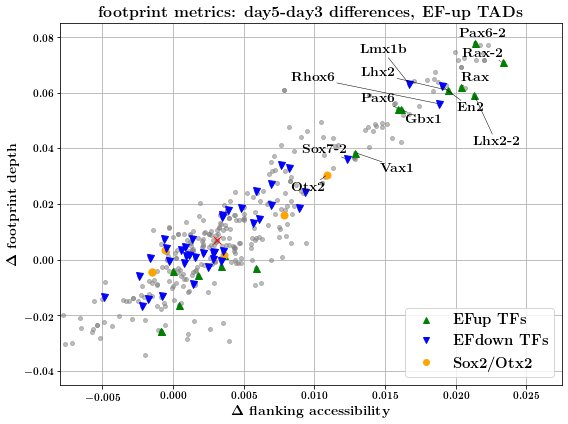

In [16]:
## EFup changes in footprinting ##

d5d3_EFup_diff = (d5_signal_all_EFup_metrics-d3_signal_all_EFup_metrics)


plt.figure(figsize=(8,6))

plt.plot(d5d3_EFup_diff[:,1],-d5d3_EFup_diff[:,0],'o',markersize=4,color='Gray',alpha=0.5)
median_vals = geometric_median(d5d3_EFup_diff)
plt.plot(median_vals[1],-median_vals[0],'x',markersize=8,color='Red')

texts = []
for k, motif in enumerate(expressed_motifs):
    
    bool_pass = False
    if motif.split('_')[0].split('-')[0] in ef_up_genes:
        if d5d3_EFup_diff[k][1] > 0.01:
            print('up'.ljust(5),motif.split('_')[0], motif)
            bool_pass = True
        plt.plot(d5d3_EFup_diff[k][1],-d5d3_EFup_diff[k][0],'^',markersize=7,color='Green')

    elif motif.split('_')[0].split('-')[0] in ef_down_genes:
        if d5d3_EFup_diff[k][1] > 0.01:
            print('down'.ljust(5),motif.split('_')[0], motif)
            bool_pass = True
        plt.plot(d5d3_EFup_diff[k][1],-d5d3_EFup_diff[k][0],'v',markersize=7,color='Blue')
    elif motif.split('_')[0].split('-')[0] in ['Sox2','Otx2']:
        if d5d3_EFup_diff[k][1] > 0.01:
            print('related:'.ljust(5),motif.split('_')[0], motif)
            bool_pass = True
        plt.plot(d5d3_EFup_diff[k][1],-d5d3_EFup_diff[k][0],'o',markersize=7,color='Orange')
        
    if bool_pass:
        tmp_txt = motif.split('_')
        if len(tmp_txt) > 2:
            tmp_txt = '-'.join(tmp_txt[:2])
        else:
            tmp_txt = tmp_txt[0]
        texts.append(plt.text(d5d3_EFup_diff[k][1],-d5d3_EFup_diff[k][0],
                                  r'\bf '+tmp_txt,fontsize=14))

ax=plt.gca()
adjust_text(texts, only_move={'points':'y', 'texts':'xy'},
            precision=0.05,
            expand_text=(1.15, 1.0), 
            expand_points=(1.21, 1.45), 
            force_text=(1.4, 2.35),
            arrowprops=dict(arrowstyle="-", color='k', lw=0.5), ax=ax) # adjust labels

plt.plot([-10],[-10],'^',markersize=6,color='Green',label=r'\bf EFup TFs')
plt.plot([-10],[-10],'v',markersize=6,color='Blue',label=r'\bf EFdown TFs')
plt.plot([-10],[-10],'o',markersize=6,color='Orange',label=r'\bf Sox2/Otx2')

plt.title(r'\bf footprint metrics: day5-day3 differences, EF-up TADs',fontsize=16)

plt.xlabel(r'\bf $\Delta$ flanking accessibility',fontsize=14)
plt.ylabel(r'\bf $\Delta$ footprint depth ',fontsize=14)
plt.grid()
plt.xlim(-0.008,0.0275)
plt.ylim(-0.045,0.085)
plt.legend(fontsize=15,loc='lower right')

plt.tight_layout()
#file_str = '06_tobias_aggregate_footprint_metrics_day3_day5-EFup.pdf'
#plt.savefig('./figures_paper/'+file_str)
plt.show()

down  Rhox6 Rhox6_PH0159.1
up    Lhx2 Lhx2_PH0092.1
up    Lhx2 Lhx2_2_M00380_2.00
up    Vax1 Vax1_PH0174.1
up    Rax Rax_PH0156.1
up    Rax Rax_2_M00426_2.00
related: Otx2 Otx2_PH0130.1
up    Gbx1 Gbx1_PH0033.1
down  Sox7 Sox7_2_PB0177.1
down  En2 En2_PH0029.1
up    Pax6 Pax6_PH0132.1
up    Pax6 Pax6_2_M00540_2.00
down  Lmx1b Lmx1b_PH0101.1


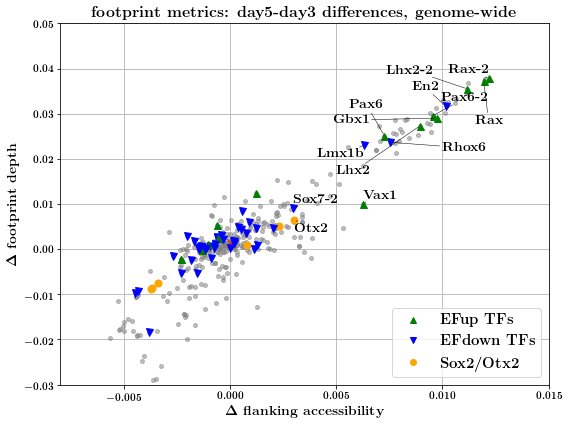

In [17]:
## genome-wide changes in footprinting ##

d5d3_gw_diff   = (d5_signal_all_gw_metrics-d3_signal_all_gw_metrics)


plt.figure(figsize=(8,6))

plt.plot(d5d3_gw_diff[:,1],-d5d3_gw_diff[:,0],'o',markersize=4,color='Gray',alpha=0.5)
median_vals = geometric_median(d5d3_gw_diff)
plt.plot(median_vals[1],-median_vals[0],'x',markersize=8,color='Red')

texts = []
for k, motif in enumerate(expressed_motifs):
    
    bool_pass = False
    if motif.split('_')[0].split('-')[0] in ef_up_genes:
        if d5d3_EFup_diff[k][1] > 0.01:
            print('up'.ljust(5),motif.split('_')[0], motif)
            bool_pass = True
        plt.plot(d5d3_gw_diff[k][1],-d5d3_gw_diff[k][0],'^',markersize=7,color='Green')

    elif motif.split('_')[0].split('-')[0] in ef_down_genes:
        if d5d3_EFup_diff[k][1] > 0.01:
            print('down'.ljust(5),motif.split('_')[0], motif)
            bool_pass = True
        plt.plot(d5d3_gw_diff[k][1],-d5d3_gw_diff[k][0],'v',markersize=7,color='Blue')
    elif motif.split('_')[0].split('-')[0] in ['Sox2','Otx2']:
        if d5d3_EFup_diff[k][1] > 0.01:
            print('related:'.ljust(5),motif.split('_')[0], motif)
            bool_pass = True
        plt.plot(d5d3_gw_diff[k][1],-d5d3_gw_diff[k][0],'o',markersize=7,color='Orange')
        
    if bool_pass:
        tmp_txt = motif.split('_')
        if len(tmp_txt) > 2:
            tmp_txt = '-'.join(tmp_txt[:2])
        else:
            tmp_txt = tmp_txt[0]
        texts.append(plt.text(d5d3_gw_diff[k][1],-d5d3_gw_diff[k][0],
                                  r'\bf '+tmp_txt,fontsize=14))

ax=plt.gca()
adjust_text(texts, only_move={'points':'y', 'texts':'xy'},
            precision=0.05,
            expand_text=(1.15, 1.0), 
            expand_points=(1.21, 1.45), 
            force_text=(1.4, 2.35),
            arrowprops=dict(arrowstyle="-", color='k', lw=0.5), ax=ax) # adjust labels

plt.plot([-10],[-10],'^',markersize=6,color='Green',label=r'\bf EFup TFs')
plt.plot([-10],[-10],'v',markersize=6,color='Blue',label=r'\bf EFdown TFs')
plt.plot([-10],[-10],'o',markersize=6,color='Orange',label=r'\bf Sox2/Otx2')

plt.title(r'\bf footprint metrics: day5-day3 differences, genome-wide',fontsize=16)

plt.xlabel(r'\bf $\Delta$ flanking accessibility',fontsize=14)
plt.ylabel(r'\bf $\Delta$ footprint depth ',fontsize=14)
plt.grid()
plt.xlim(-0.008,0.015)
plt.ylim(-0.030,0.050)
plt.legend(fontsize=15,loc='lower right')

plt.tight_layout()
#file_str = '06_tobias_aggregate_footprint_metrics_day3_day5-genome-wide.pdf'
#plt.savefig('./figures_paper/'+file_str)
plt.show()